In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import ADASYN

In [2]:
data = pd.read_csv("hcvdat0.csv", sep=',')
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
data.drop(data.columns[data.columns.str.contains('unnamed', case = False)], axis = 1, inplace = True)

In [4]:
data['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [5]:
sex = {'m': 1,'f': 0}
category = {
    '0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
    '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1
}
data.Sex = [sex[item] for item in data.Sex]
data.Category = [category[item] for item in data.Category]
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
data.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,0.121951,47.408130,0.613008,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,0.327496,10.055105,0.487458,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,0.000000,19.000000,0.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,0.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,1.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,1.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,1.000000,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [7]:
data.shape

(615, 13)

In [8]:
data.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [9]:
names = data.columns[data.isna().any()].tolist()
names 

['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']

In [10]:
for name in names:
    data[name].fillna((data[name].mean()), inplace=True)


In [11]:
data.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

Text(0.5, 0.98, 'Boxplots to visualize outliers')

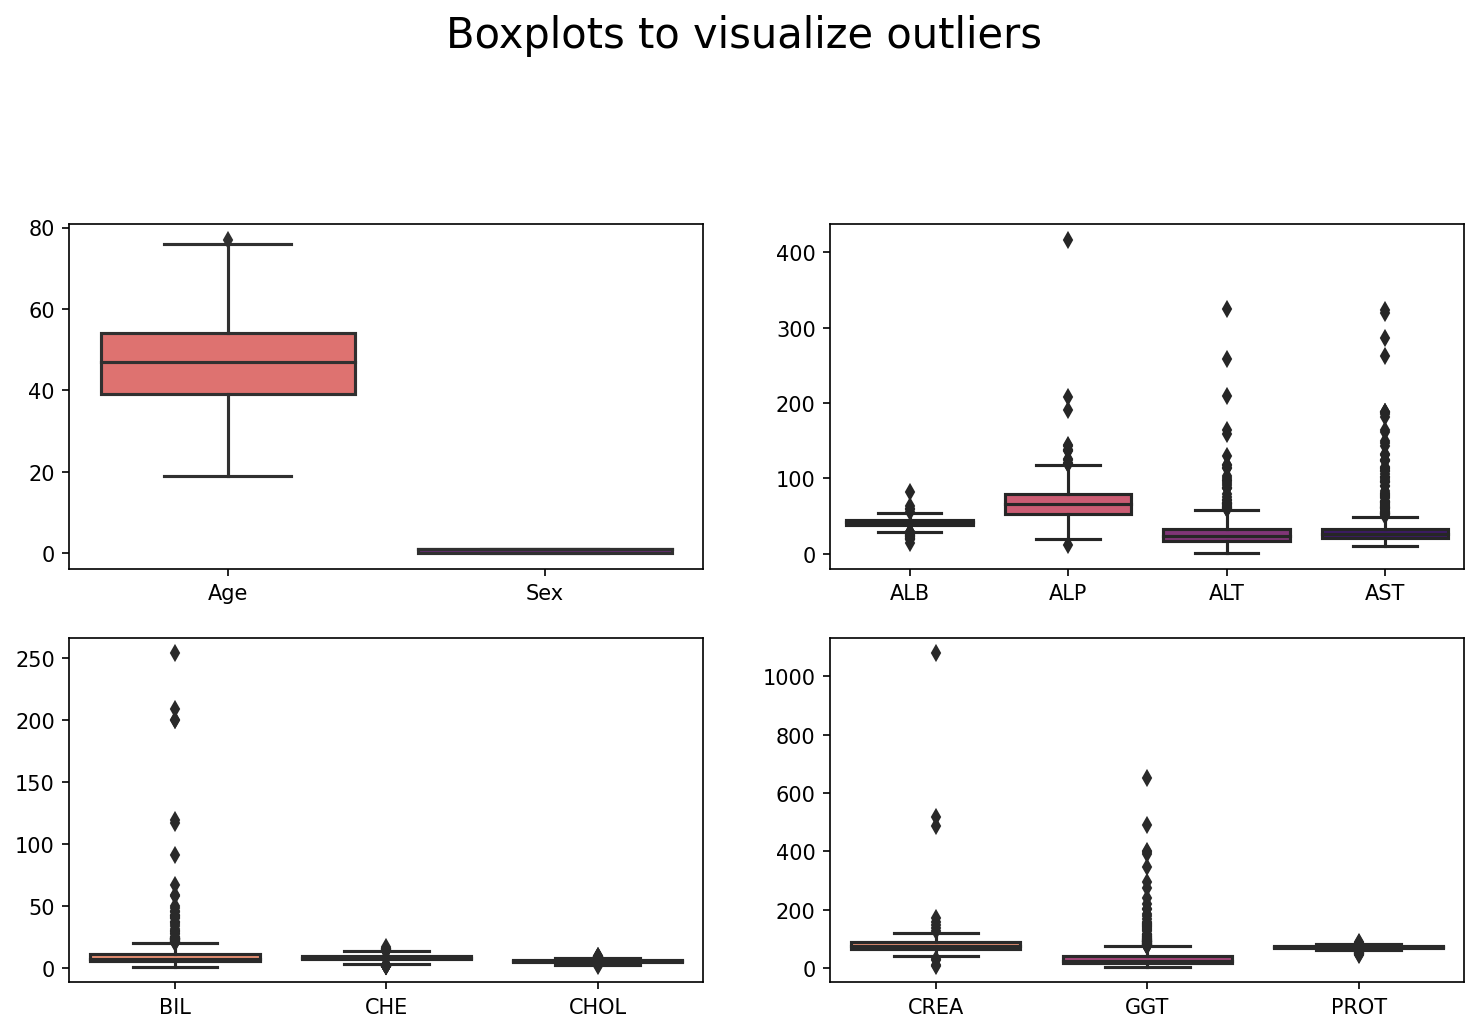

In [12]:
plt.figure(dpi=150, figsize=(12,14))

plt.subplot(4, 2, 1)
sns.boxplot(data=data[['Age', 'Sex']], palette="magma_r")

plt.subplot(4, 2, 2)
sns.boxplot(data=data[['ALB', 'ALP', 'ALT', 'AST']], palette="magma_r")

plt.subplot(4, 2, 3)
sns.boxplot(data=data[['BIL', 'CHE', 'CHOL']], palette="magma_r")

plt.subplot(4, 2, 4)
sns.boxplot(data=data[['CREA', 'GGT', 'PROT']], palette="magma_r")

plt.suptitle("Boxplots to visualize outliers", fontsize=20)

C:\Users\Miłosz\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Miłosz\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Miłosz\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

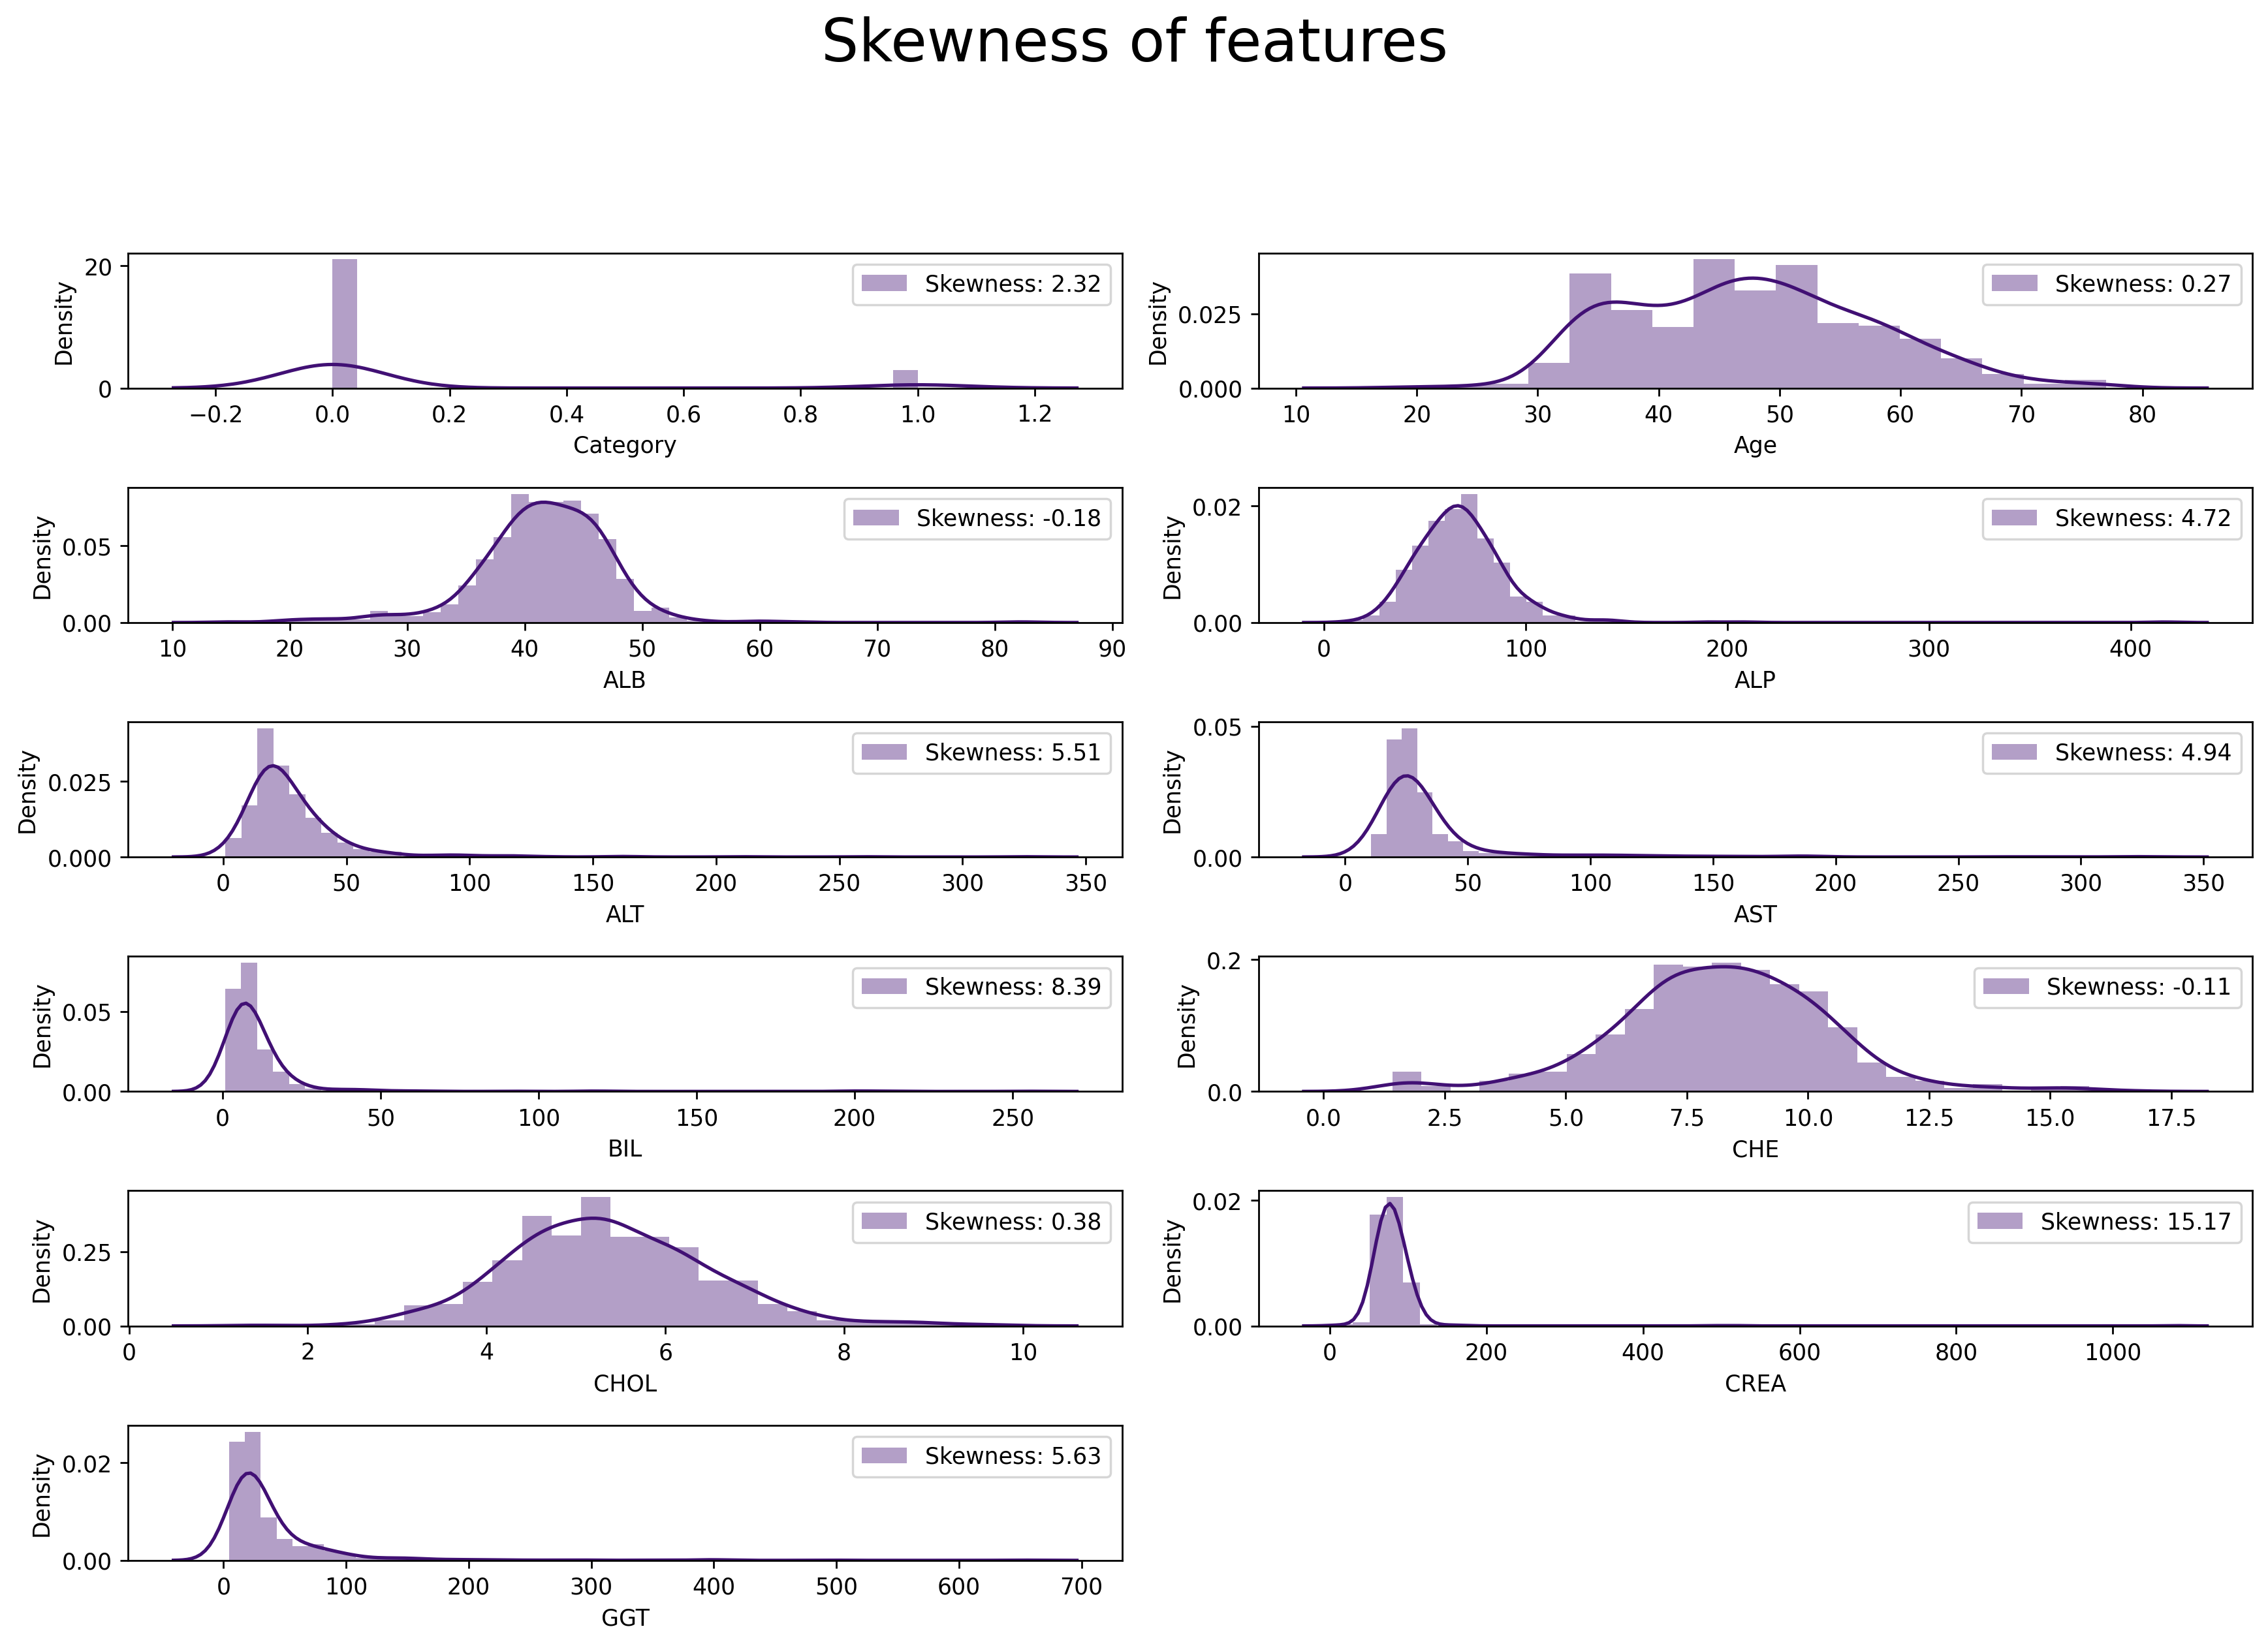

In [13]:
skewness = [data[feature].skew() for feature in data.columns[0:12].drop('Sex')]

plt.figure(figsize=(14,16), dpi=250)
for i, skew, feature in zip(range(0,11), skewness, data.columns[0:12].drop('Sex')):
    plt.subplot(11, 2, i+1)
    sns.distplot(data[feature], color="#411074", label="Skewness: %.2f"%(skew))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.suptitle("Skewness of features", fontsize=26, y=1.05)

In [14]:
# Q1 
q1 = data.quantile(0.25)
# Q3
q3 = data.quantile(0.75)
# IQR
IQR = q3 - q1
# Outlier range
upper = q3 + IQR * 1.5
lower = q1 - IQR * 1.5
upper_dict = dict(upper)
lower_dict = dict(lower)

In [15]:
for i, v in data.items():
    v_col = v[( v<= lower_dict[i]) | (v >= upper_dict[i])]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column {} outliers = {} => {}%".format(i, len(v_col), round((perc),3)))

Column Category outliers = 615 => 100.0%
Column Age outliers = 1 => 0.163%
Column Sex outliers = 0 => 0.0%
Column ALB outliers = 27 => 4.39%
Column ALP outliers = 14 => 2.276%
Column ALT outliers = 36 => 5.854%
Column AST outliers = 64 => 10.407%
Column BIL outliers = 47 => 7.642%
Column CHE outliers = 24 => 3.902%
Column CHOL outliers = 12 => 1.951%
Column CREA outliers = 12 => 1.951%
Column GGT outliers = 65 => 10.569%
Column PROT outliers = 20 => 3.252%


C:\Users\Miłosz\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    540
1     75
Name: Category, dtype: int64

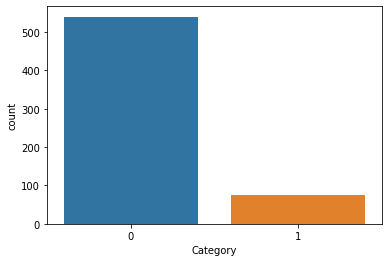

In [16]:
sns.countplot(data['Category'], label='count').set(title='')
data['Category'].value_counts()

C:\Users\Miłosz\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    377
0    238
Name: Sex, dtype: int64

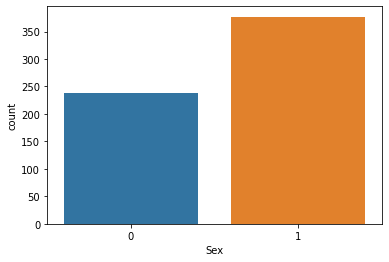

In [17]:
sns.countplot(data['Sex'], label='count')
data['Sex'].value_counts()

C:\Users\Miłosz\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Miłosz\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

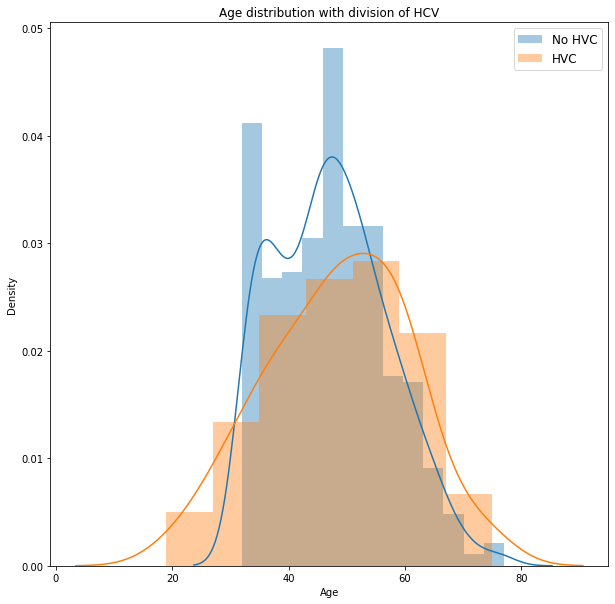

In [18]:
categories = ['No HVC', 'HVC']

plt.figure(figsize=(10, 10))
for i, name in enumerate(categories):
    df = data[data.Category == i]
    sns.distplot(df['Age'], kde=True, label=name)

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Age distribution with division of HCV')
plt.xlabel('Age')
plt.ylabel('Density')

In [19]:
data.corr()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,0.037781,0.071663,-0.179859,-0.061356,0.088726,0.621724,0.398451,-0.230785,-0.265474,0.136772,0.437680,0.083956
Age,0.037781,1.000000,-0.024544,-0.197005,0.168473,-0.006017,0.088666,0.032492,-0.075093,0.123978,-0.022296,0.153087,-0.153665
Sex,0.071663,-0.024544,1.000000,0.146065,-0.019547,0.161785,0.130891,0.111177,0.169111,-0.029886,0.159589,0.133276,0.051250
ALB,-0.179859,-0.197005,0.146065,1.000000,-0.138858,0.001606,-0.193397,-0.221650,0.375848,0.204803,-0.001573,-0.155555,0.550033
ALP,-0.061356,0.168473,-0.019547,-0.138858,1.000000,0.172461,0.062202,0.048600,0.032971,0.121914,0.149554,0.442262,-0.053633
ALT,0.088726,-0.006017,0.161785,0.001606,0.172461,1.000000,0.273325,-0.038468,0.146953,0.068023,-0.043025,0.248086,0.094373
AST,0.621724,0.088666,0.130891,-0.193397,0.062202,0.273325,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263,0.039888
BIL,0.398451,0.032492,0.111177,-0.221650,0.048600,-0.038468,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024,-0.041309
CHE,-0.230785,-0.075093,0.169111,0.375848,0.032971,0.146953,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345,0.293184
CHOL,-0.265474,0.123978,-0.029886,0.204803,0.121914,0.068023,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828,0.206546


<AxesSubplot:>

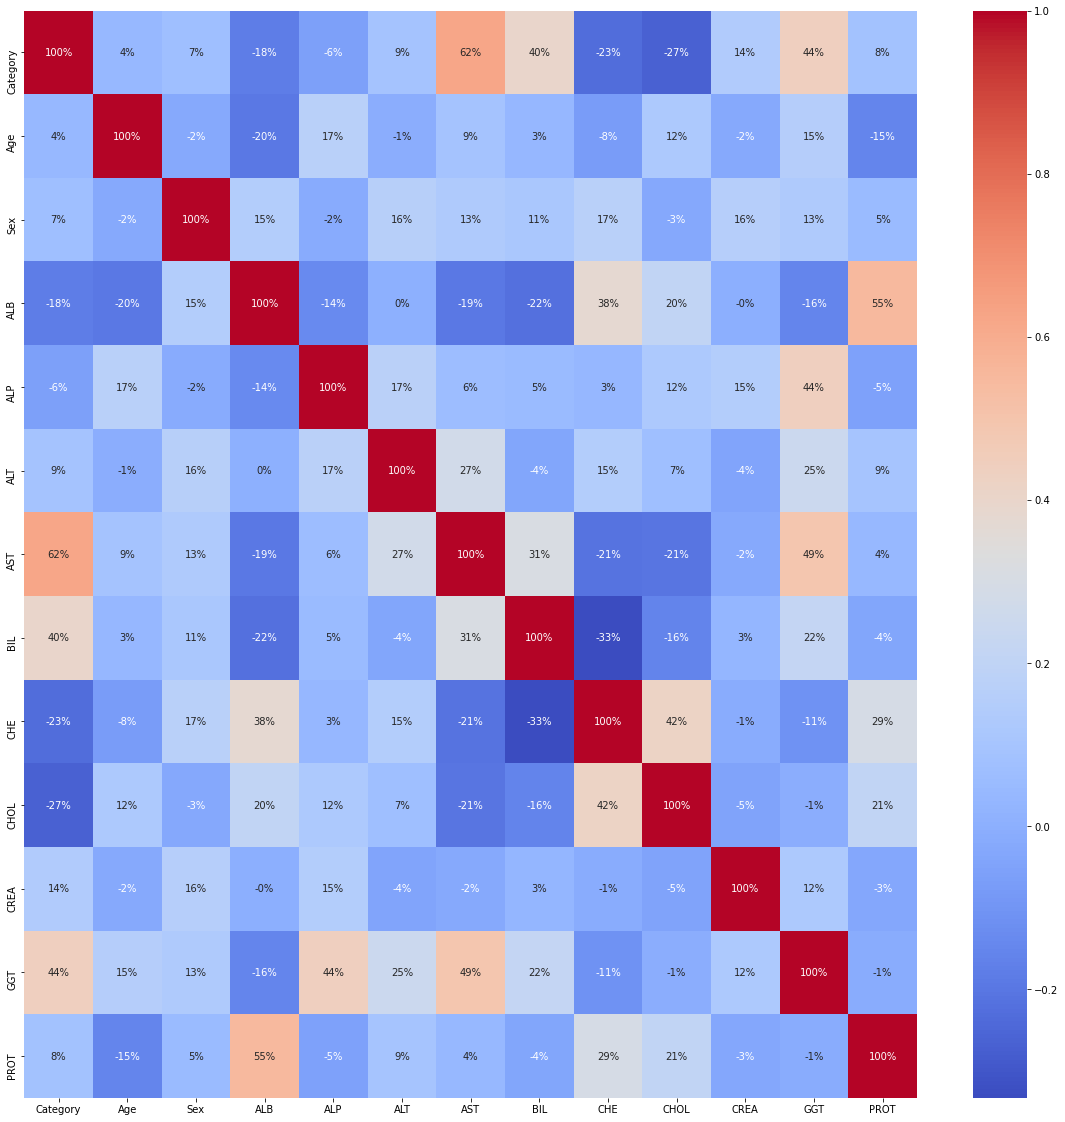

In [20]:
plt.figure(figsize=(20,20))  
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.0%')

> Column Category outliers = 615 => 100.0%
> Column Age outliers = 1 => 0.163%
> Column Sex outliers = 0 => 0.0%
> Column ALB outliers = 27 => 4.39%
> Column ALP outliers = 14 => 2.276%
> Column ALT outliers = 36 => 5.854%
> Column AST outliers = 64 => 10.407%
> Column BIL outliers = 47 => 7.642%
> Column CHE outliers = 24 => 3.902%
> Column CHOL outliers = 12 => 1.951%
> Column CREA outliers = 12 => 1.951%
> Column GGT outliers = 65 => 10.569%
> Column PROT outliers = 20 => 3.252%

In [21]:
#Using log transformation
scaler = RobustScaler()
columns_to_scale = ["AST", "GGT", "BIL", 'ALT']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
print("The first 5 rows of transformed data are")
data.head()

The first 5 rows of transformed data are


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,-0.918919,-0.336283,0.033898,6.93,3.23,106.0,-0.457143,69.0
1,0,32,1,38.5,70.3,-0.300300,-0.106195,-0.576271,11.17,4.80,74.0,-0.314286,76.5
2,0,32,1,46.9,74.7,0.792793,2.362832,-0.203390,8.84,5.20,86.0,0.404082,79.3
3,0,32,1,43.2,52.0,0.456456,-0.292035,1.966102,7.33,4.74,80.0,0.428571,75.7
4,0,32,1,39.2,74.1,0.576577,-0.097345,0.389831,9.15,4.32,76.0,0.269388,68.7


In [22]:
X = data.drop('Category', axis=1).copy()
y = data['Category'].copy()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size = 0.30, random_state = 0, stratify = y)

In [24]:
y_values = y_train.values
X_train, y_train = ADASYN(random_state=0).fit_resample(X_train, y_train)

In [25]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 432, 1: 435}

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=0)) 
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=0))
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier()) 

tree = DecisionTreeClassifier(random_state=0)
tree = tree.fit(X_train, y_train)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

param_C = np.arange(0.01, 1.0, 0.01)
param_gamma = np.arange(0.01, 1.0, 0.01)
param_pca = np.arange(2, 25)
param_knn = np.arange(2, 25)

param_grid_lr = [{'logisticregression__C': param_C,'pca__n_components': param_pca}]

param_grid_svc = [{'svc__C': param_C, 
               'svc__kernel': ['linear']},
              {'svc__C': param_gamma, 
               'svc__gamma': param_C, 
               'svc__kernel': ['rbf']}]

param_grid_knn = [{'kneighborsclassifier__n_neighbors': param_knn}]


path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

random_grid_tree = {'ccp_alpha': ccp_alphas,
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.arange(1, 30)]}

random_grid_forest = {'n_estimators': [x for x in np.arange(10, 300, 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.arange(1, 20)],
               'min_samples_split': np.arange(1, 20),
               'min_samples_leaf': np.arange(1, 5),
               'bootstrap': [True, False]}

random_grid_ada = {'n_estimators': [x for x in np.arange(10, 400, 5)],
                  'learning_rate': np.arange(0.1, 4.1, 0.1)}

classifiers_1 = [pipe_lr, pipe_svc, pipe_knn]
parameters_1 = [param_grid_lr, param_grid_svc, param_grid_knn]
names_1 = ['Logistic Regression', 'SVC', 'KNN']

classifiers_2 = [tree, forest, ada]
parameters_2 = [random_grid_tree, random_grid_forest, random_grid_ada]
names_2 = ['Decision Tree', 'Random Forest', 'AdaBoost']

for clf, param, name in zip(classifiers_1, parameters_1, names_1):
    clf.fit(X_train, y_train)
    gs = GridSearchCV(estimator=clf, 
                      param_grid=param, 
                      scoring='accuracy', 
                      cv=5,
                      n_jobs=-1)
    
    
    gs = gs.fit(X_train, y_train)
    print(name)
    print(round(gs.best_score_, 2))
    print(gs.best_params_)
    y_pred = gs.predict(X_test)
    print("The test accuracy score of {} after hyper-parameter tuning is ".format(name), round(accuracy_score(y_test, y_pred),2))
    print("")

for clf, param, name in zip(classifiers_2, parameters_2, names_2):
    rs = RandomizedSearchCV(estimator=clf, 
                                   param_distributions=param, 
                                   n_iter=100, cv=5, verbose=2, 
                                   random_state=0, n_jobs=-1)

    # # Fit the random search model
    print(name)
    rs.fit(X_train, y_train)
    print(rs.best_params_)
    print('accuracy:', round(rs.best_score_, 2))
    y_pred = rs.predict(X_test)
    print("The test accuracy score of {} after hyper-parameter tuning is".format(name), round(accuracy_score(y_test, y_pred),2))
    print("")

    

C:\Users\Miłosz\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.7809315  0.83745266 0.84666135 ...        nan        nan        nan]
  warnings.warn(


Logistic Regression
0.96
{'logisticregression__C': 0.87, 'pca__n_components': 10}
The test accuracy score of Logistic Regression after hyper-parameter tuning is  0.94

SVC
0.98
{'svc__C': 0.99, 'svc__gamma': 0.11, 'svc__kernel': 'rbf'}
The test accuracy score of SVC after hyper-parameter tuning is  0.97

KNN
0.97
{'kneighborsclassifier__n_neighbors': 2}
The test accuracy score of KNN after hyper-parameter tuning is  0.92

Decision Tree
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'max_features': 'auto', 'max_depth': 8, 'ccp_alpha': 0.0}
accuracy: 0.95
The test accuracy score of Decision Tree after hyper-parameter tuning is 0.93

Random Forest
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Miłosz\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.98962195        nan 0.98500432 0.98385489 0.98385489 0.98846588
 0.98961531 0.99077138 0.9896286  0.9227161  0.98731646 0.98961531
 0.96076008 0.9919208  0.98846588 0.98616703 0.98499767 0.9873231
 0.98616703 0.94460833 0.98616703 0.98269882 0.99077802 0.98731646
 0.98153611 0.9896286  0.98500432 0.96191615 0.98961531 0.98961531
 0.98847253 0.98615374 0.98845924 0.98847253 0.98731646 0.97576241
 0.98961531 0.99077138 0.98847253        nan 0.98501096 0.98846588
 0.9896286  0.98269218 0.98730981 0.98615374 0.97114477 0.98961531
 0.97115142 0.9861471  0.99077802 0.98500432 0.99077138 0.98731646
 0.98731646 0.9515381  0.98845924 0.98269882 0.95844794 0.99077138
 0.98500432 0.99077802        nan 0.99077138 0.98962195 0.99077802
 0.96076008 0.9273138  0.99192745 0.98154275 0.98386154 0.98847253
 0.98846588 0.98730981 0.98961531 0

{'n_estimators': 175, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
accuracy: 0.99
The test accuracy score of Random Forest after hyper-parameter tuning is 0.97

AdaBoost
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 235, 'learning_rate': 1.1}
accuracy: 0.99
The test accuracy score of AdaBoost after hyper-parameter tuning is 0.98



In [27]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression(C=0.87, random_state=0))
pipe_svc = make_pipeline(StandardScaler(), SVC(C=0.99, gamma=0.11, kernel='rbf', random_state=0, probability=True))
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=2))

pipe_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier(ccp_alpha=0, random_state=0, max_features = 'auto',
                                                                     max_depth=8, criterion = 'gini'))

pipe_forest = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=175, random_state=0,
                                                                      min_samples_leaf=1, max_features = 'sqrt',
                                                                     max_depth=10, bootstrap=False,
                                                                    min_samples_split=6))

pipe_ada = make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=235, random_state=0, learning_rate = 1.1))
classifiers = [pipe_lr, pipe_svc, pipe_knn, pipe_tree, pipe_forest, pipe_ada]
names = names_1
names += names_2

In [28]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
    print(name)
    print('Dokładność sprawdzianu: %.3f +/- %.3f' % ((np.mean(scores)), np.std(scores)))

Logistic Regression
Dokładność sprawdzianu: 0.963 +/- 0.016
SVC
Dokładność sprawdzianu: 0.983 +/- 0.008
KNN
Dokładność sprawdzianu: 0.967 +/- 0.025
Decision Tree
Dokładność sprawdzianu: 0.947 +/- 0.026
Random Forest
Dokładność sprawdzianu: 0.992 +/- 0.009
AdaBoost
Dokładność sprawdzianu: 0.992 +/- 0.006


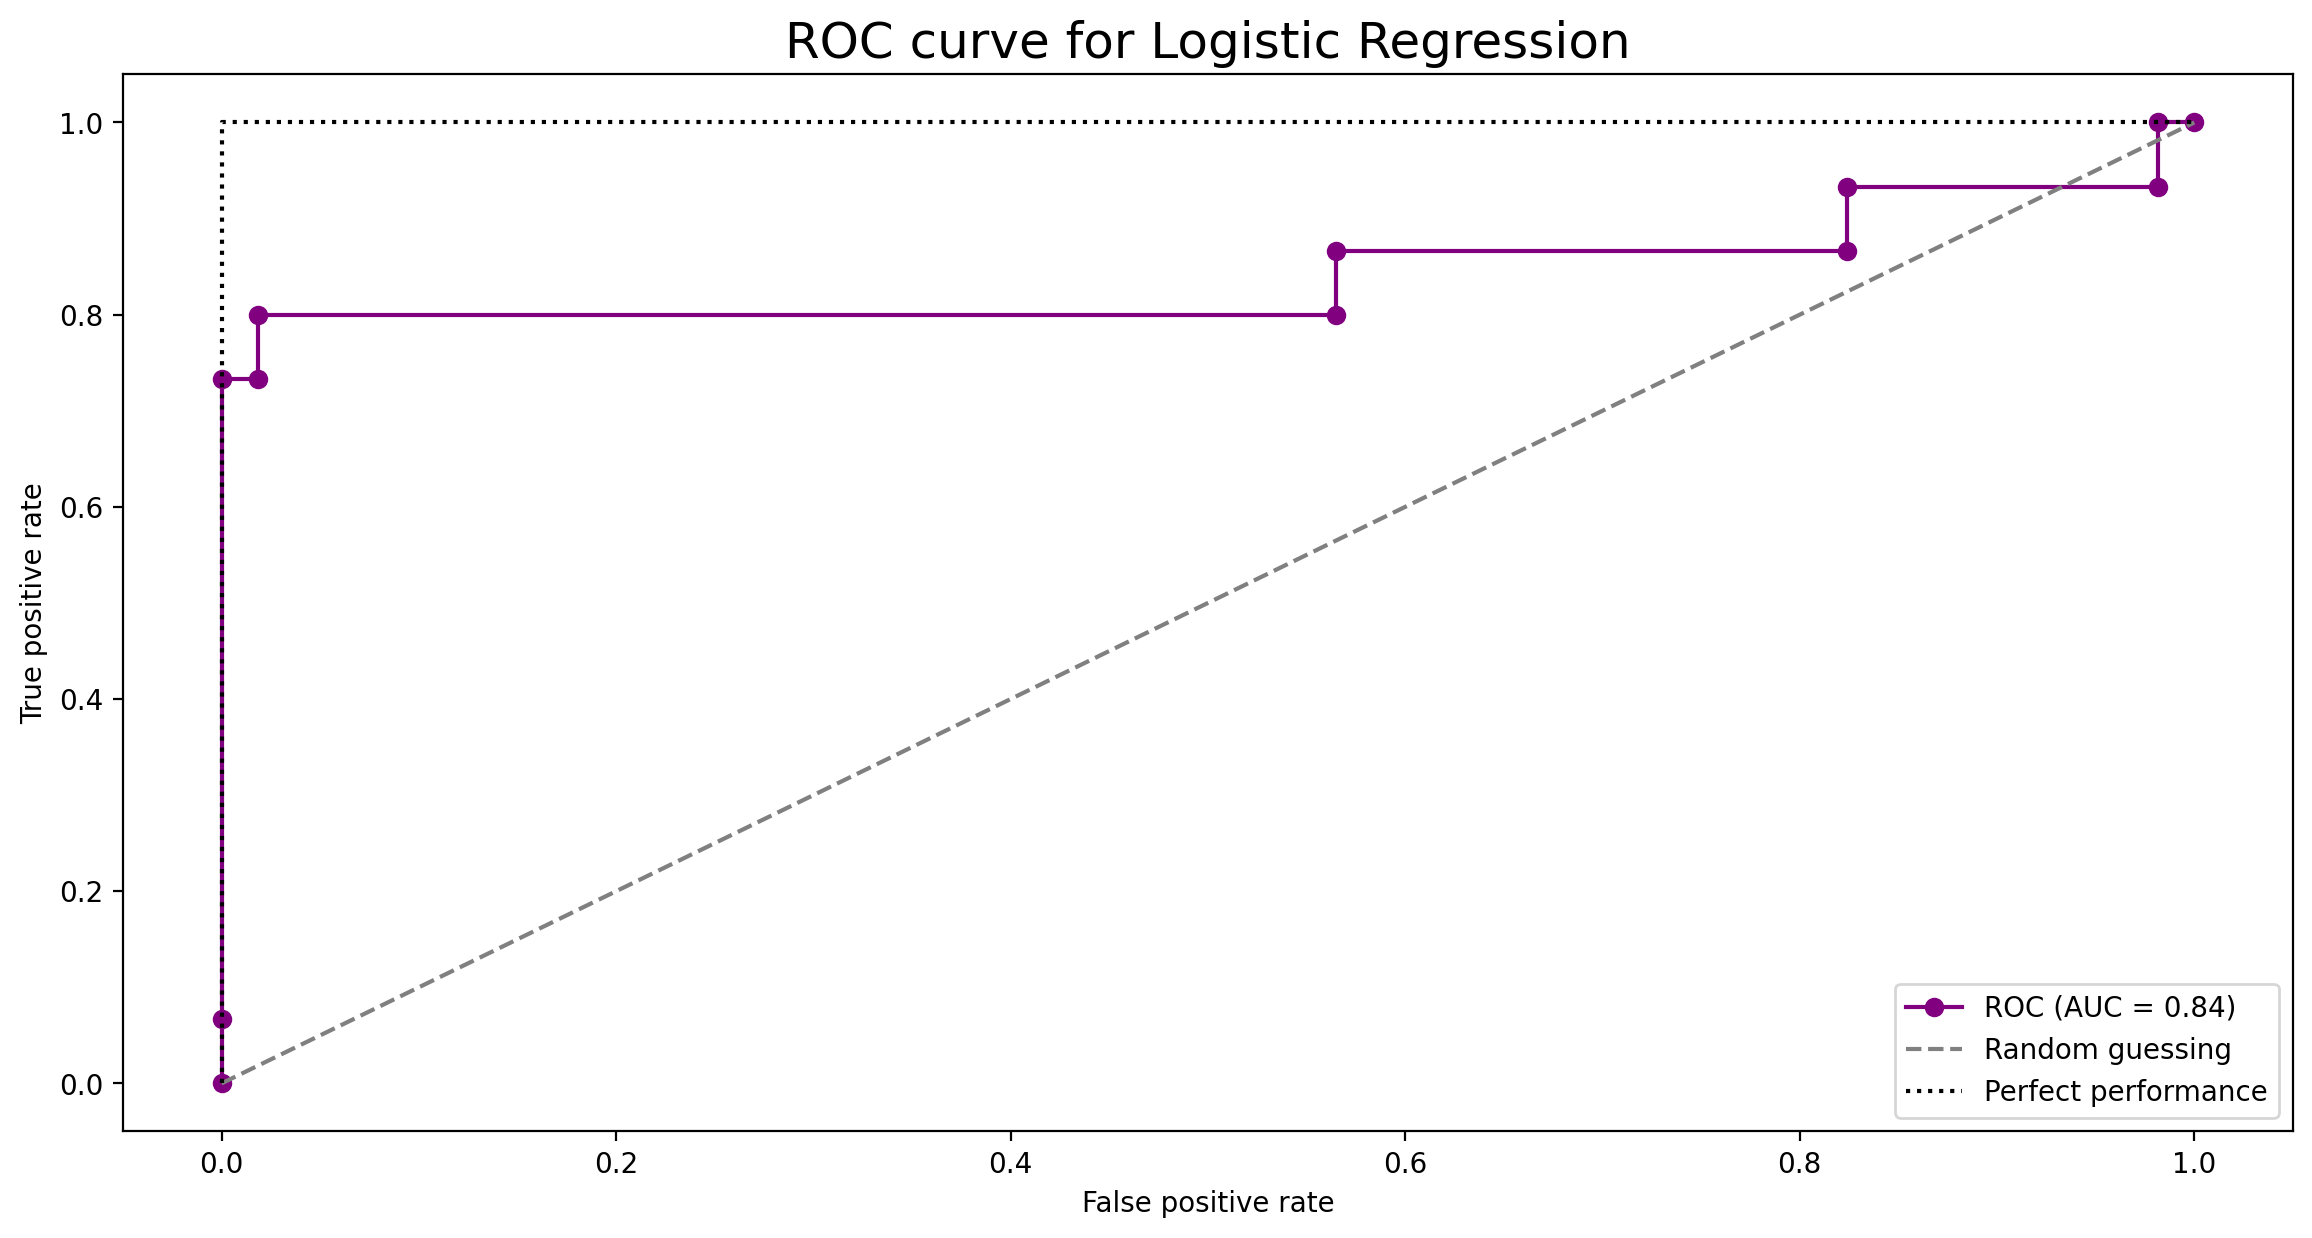

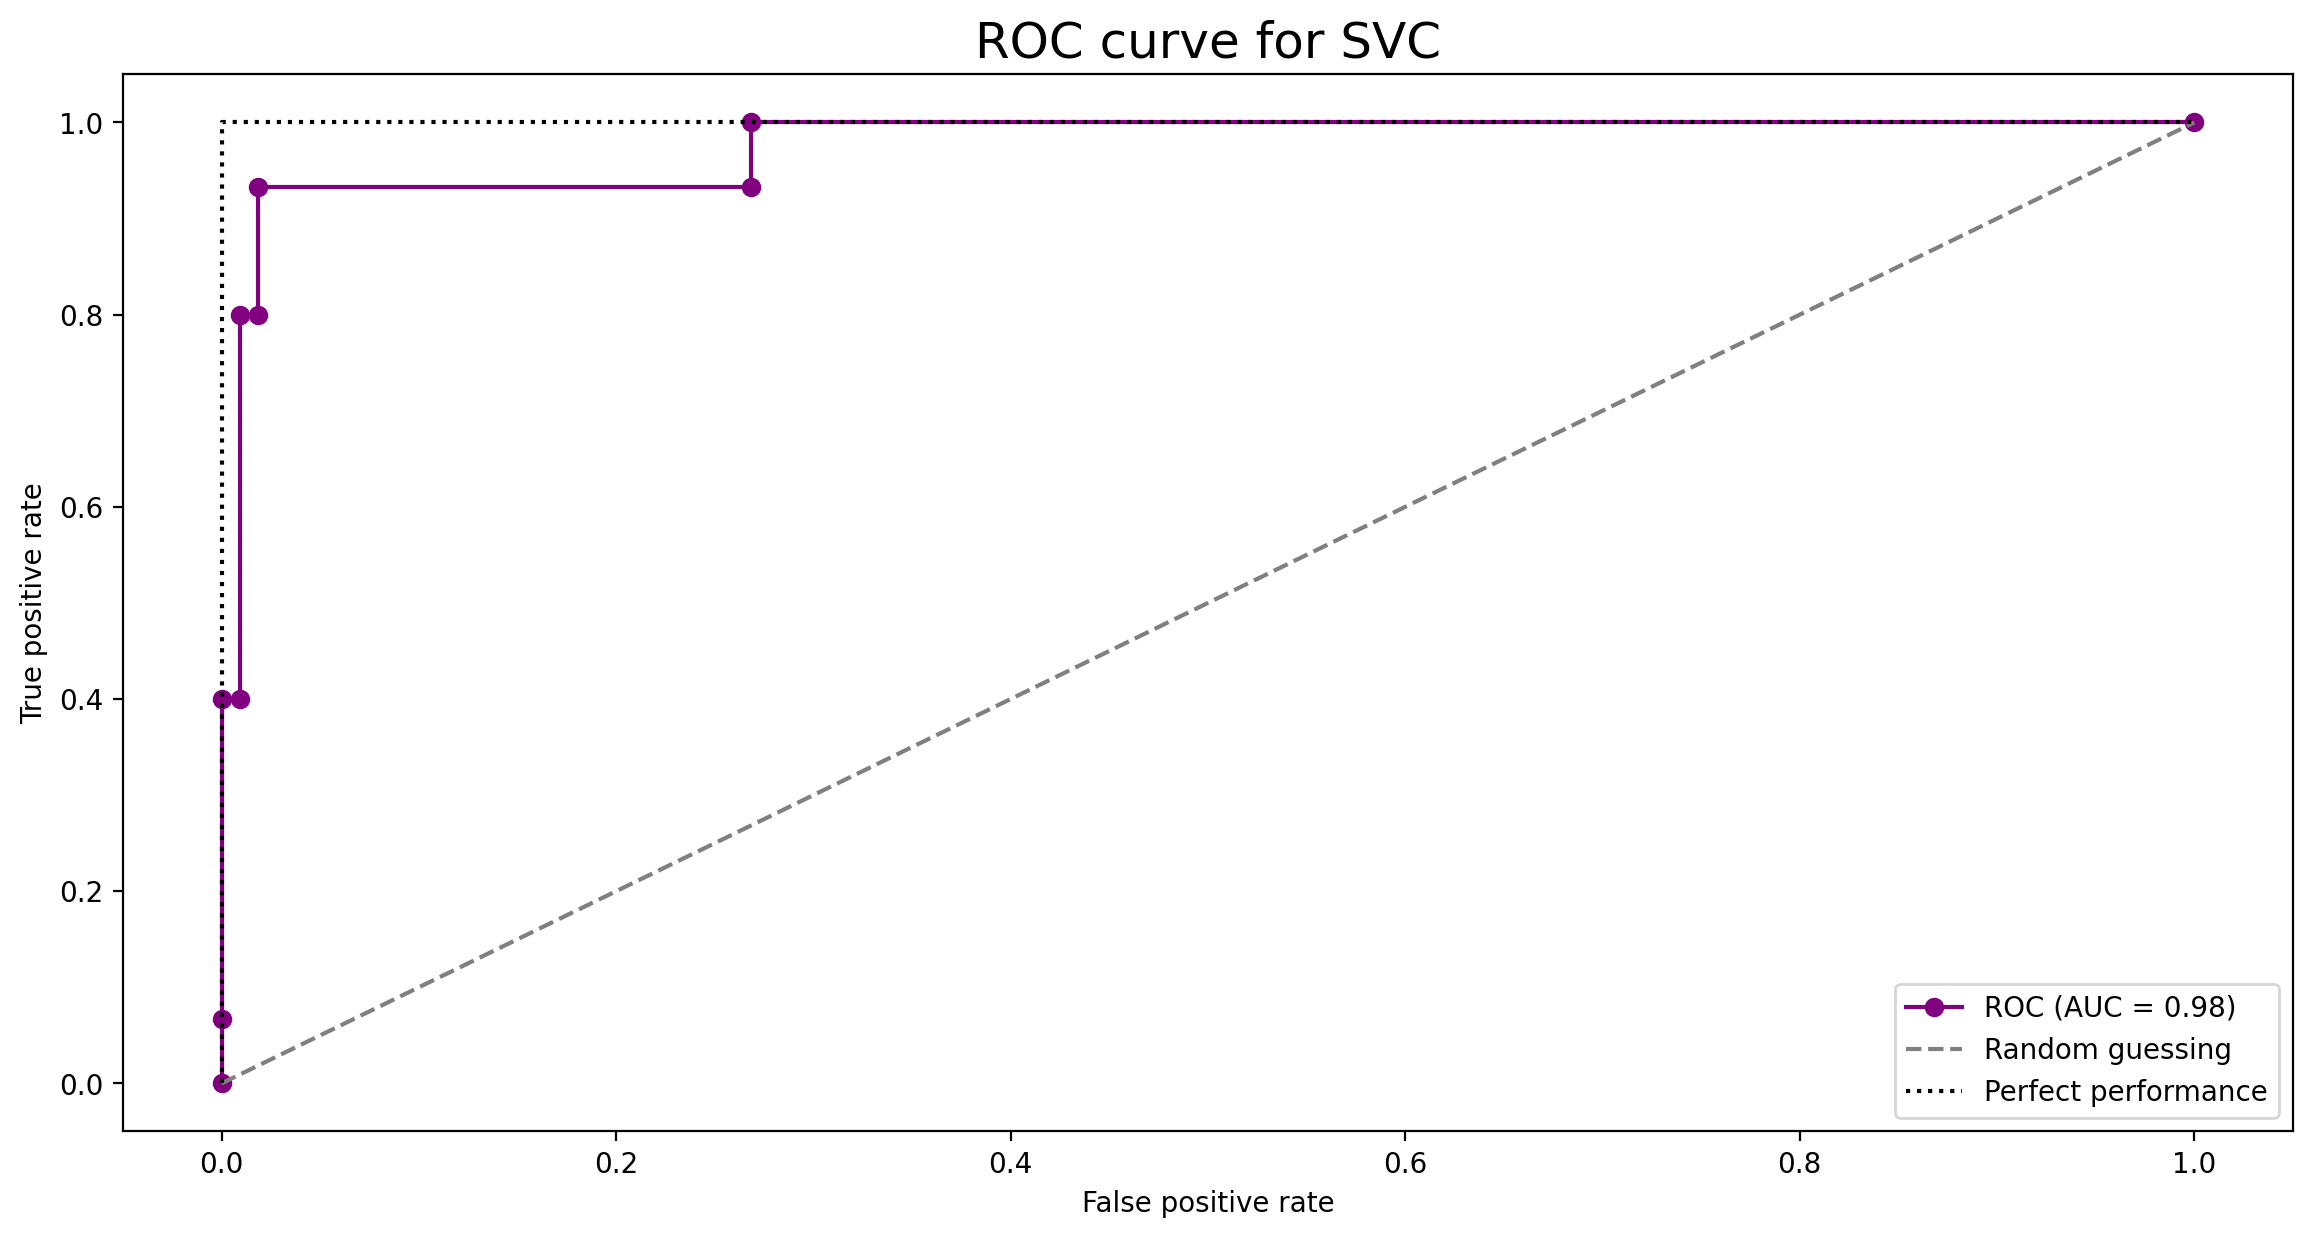

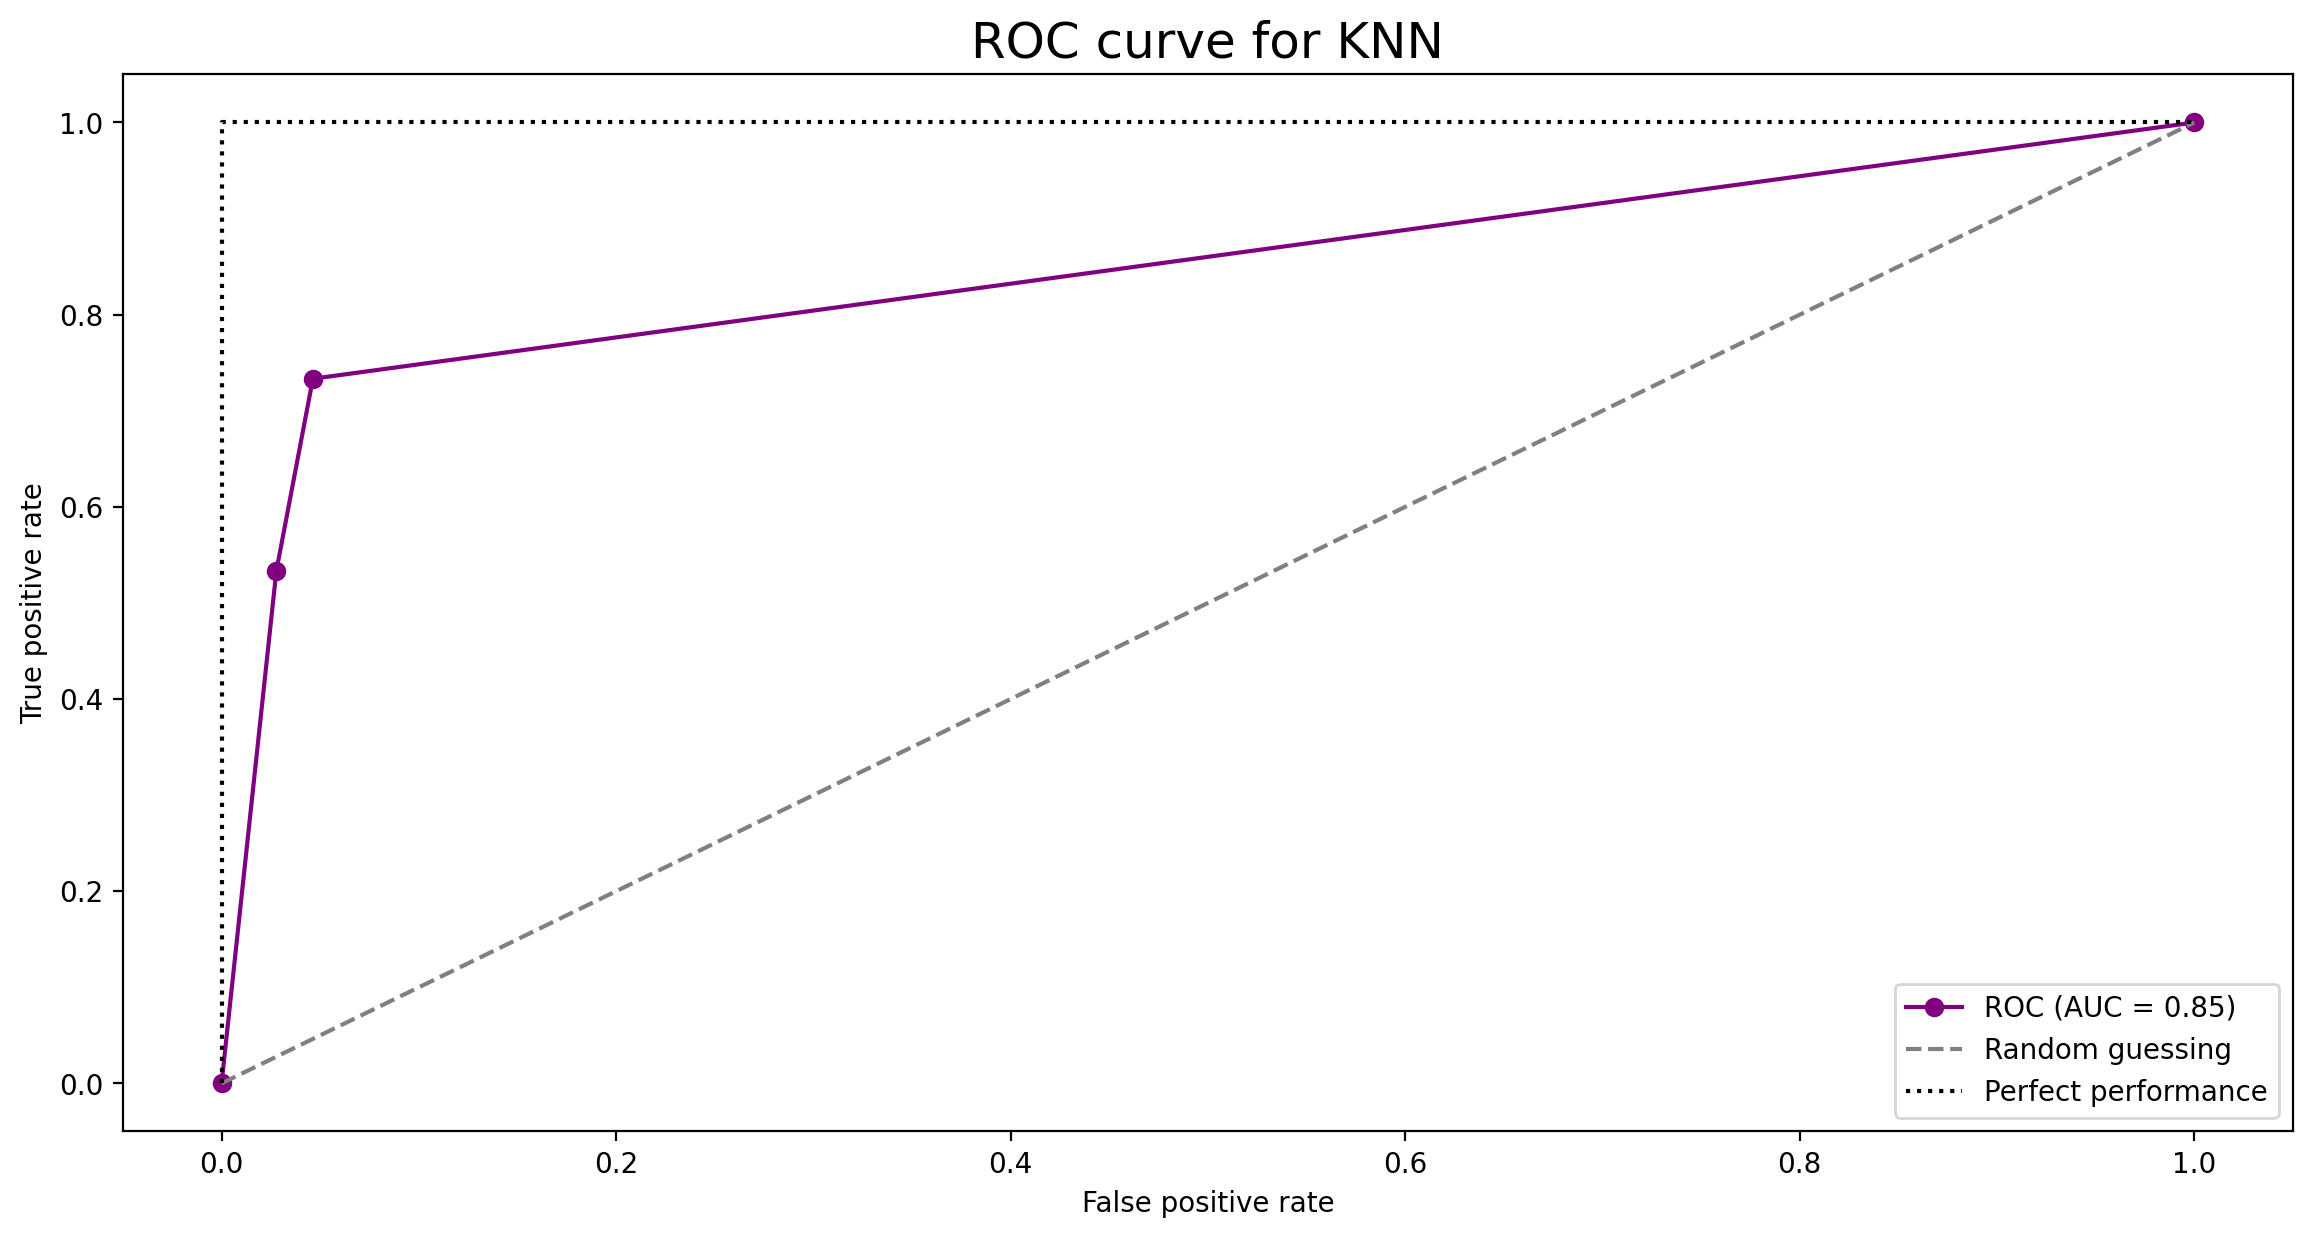

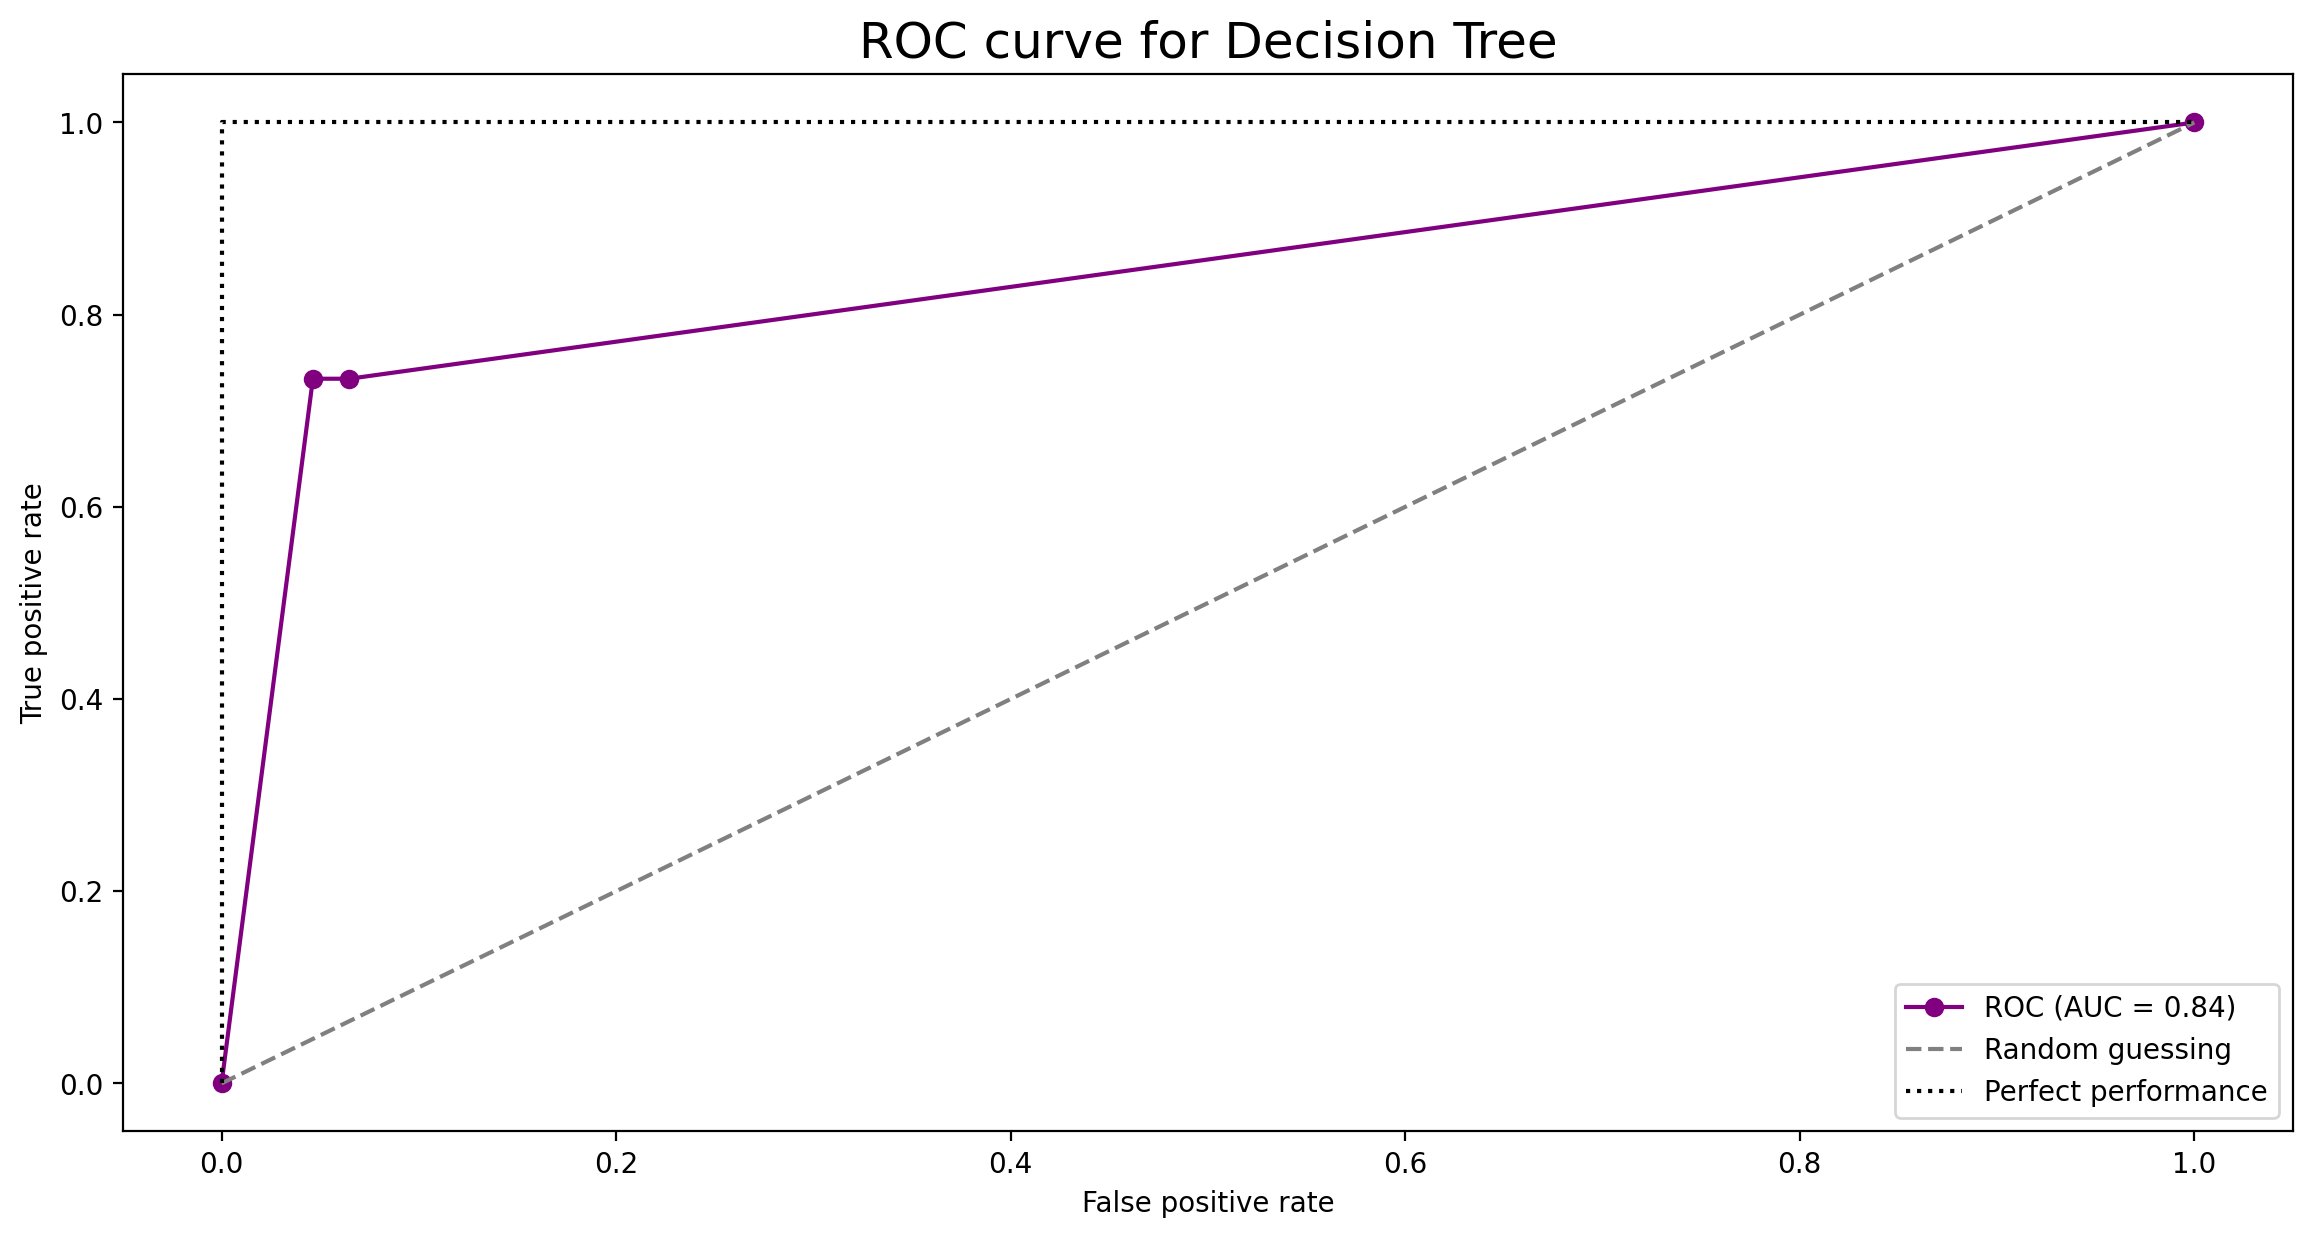

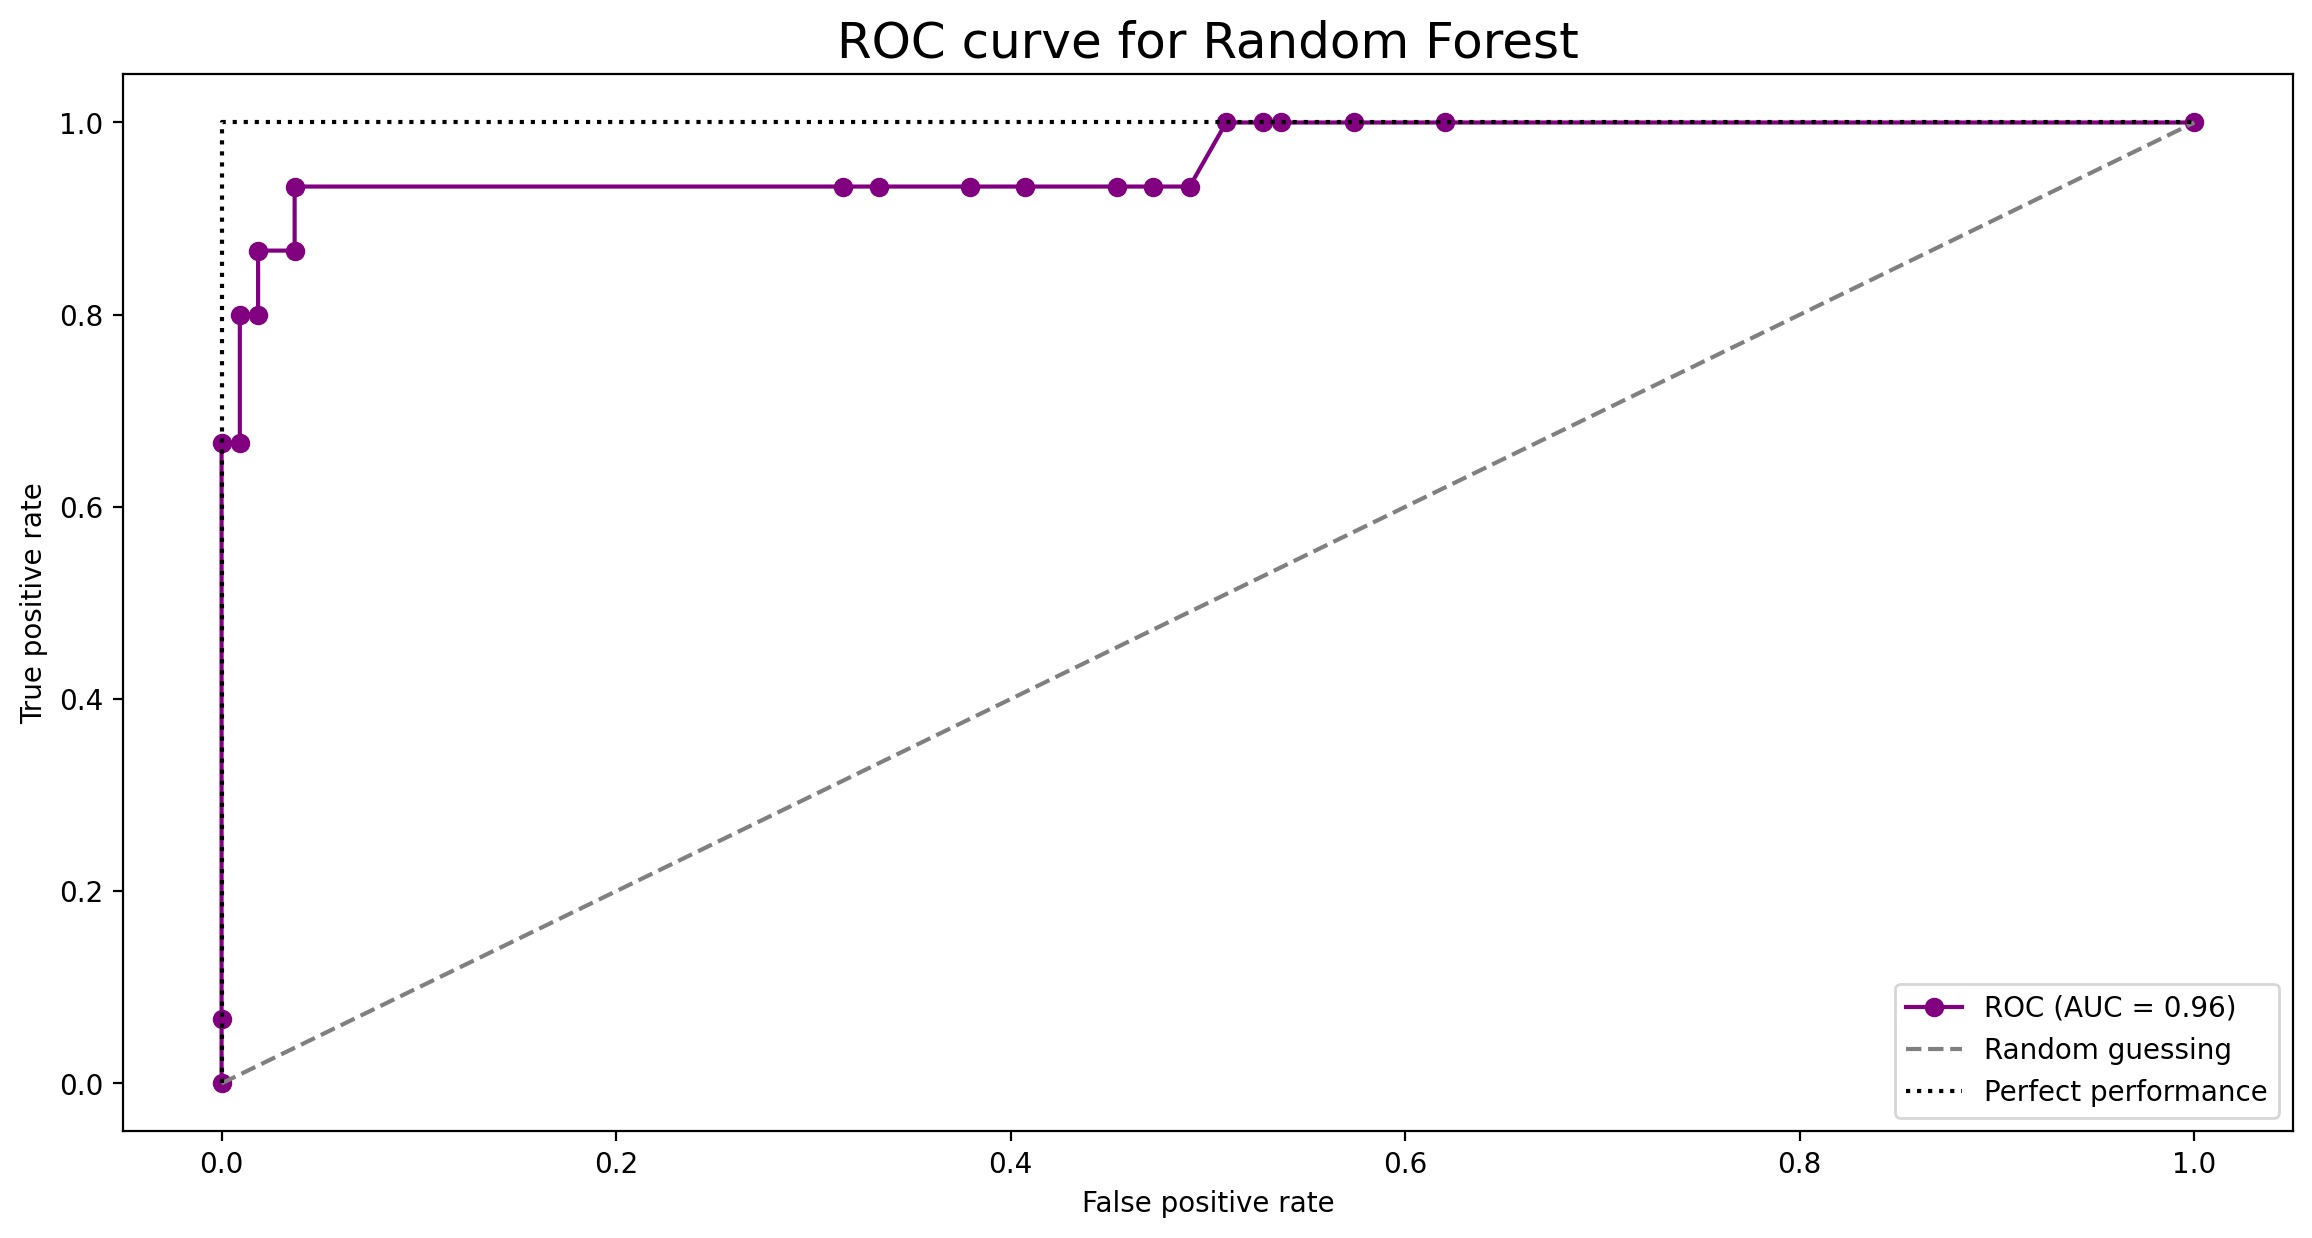

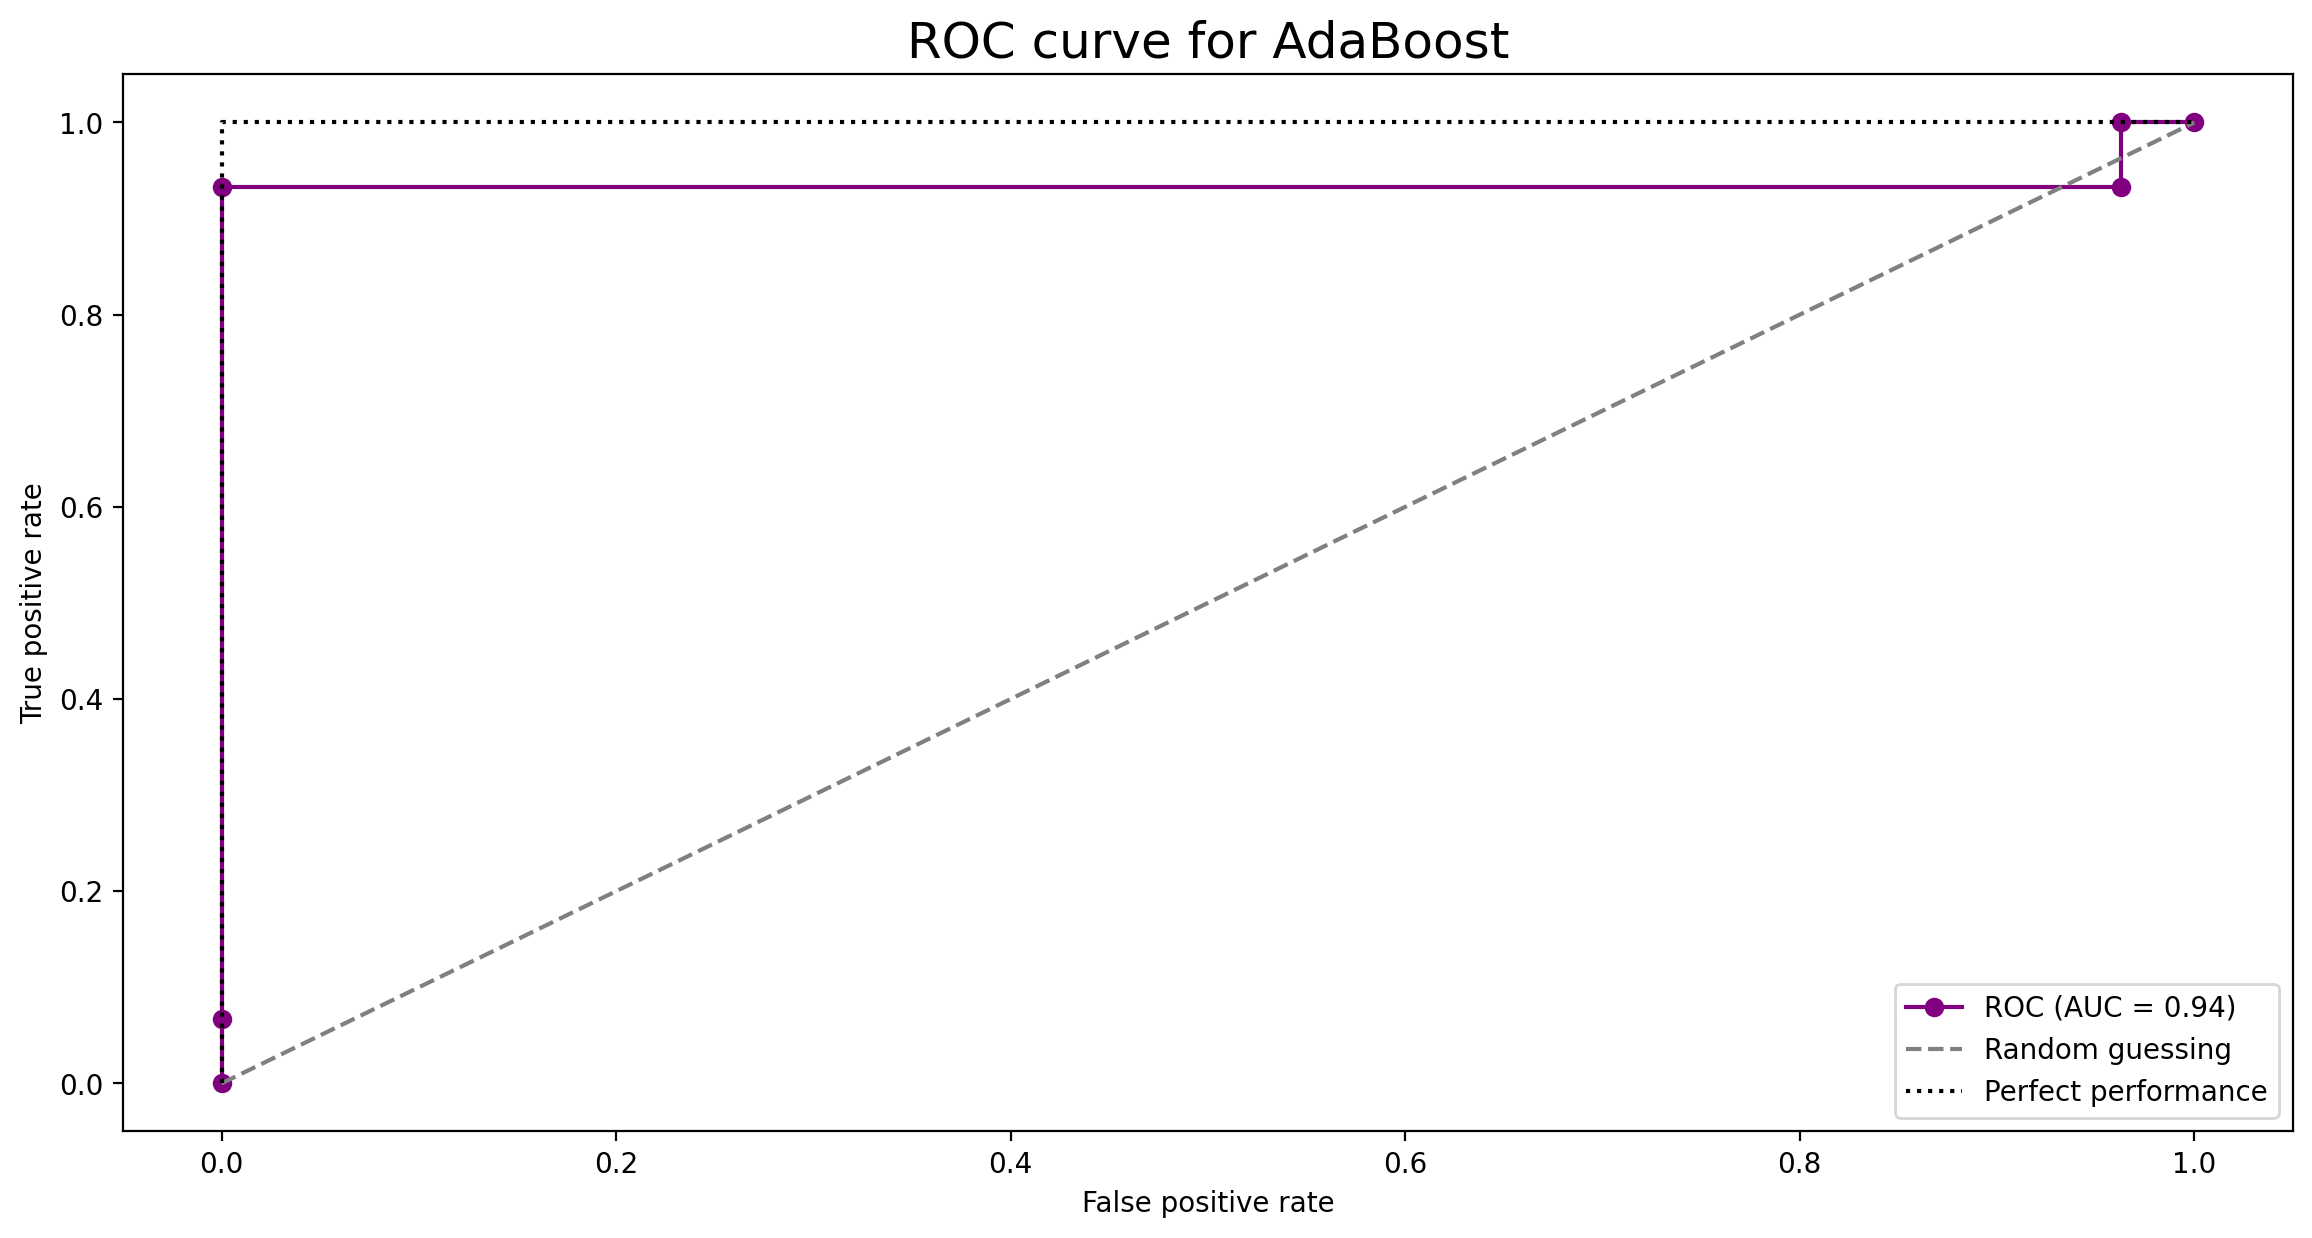

In [29]:
for clf, name in zip(classifiers, names):
    probas = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure(dpi=200, figsize=(14,7))
    plt.plot(fpr, tpr, color="purple", marker="o", label="ROC (AUC = %.2f)" % (roc_auc))
    plt.plot([0, 1], [0,1], linestyle="--", color="gray", label="Random guessing")
    plt.plot([0,0,1], [0,1,1], linestyle=":", color="black", label="Perfect performance")
    plt.legend(loc="best")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve for {}".format(name), fontsize=18)

Test accuracy for Logistic Regression: 0.94

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.75      0.80      0.77        15

    accuracy                           0.94       123
   macro avg       0.86      0.88      0.87       123
weighted avg       0.94      0.94      0.94       123



<Figure size 720x720 with 0 Axes>

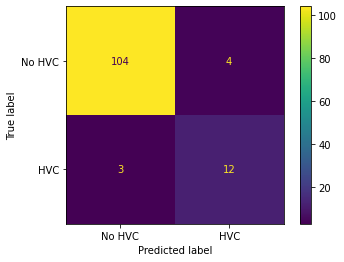

Test accuracy for SVC: 0.97

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.87      0.87      0.87        15

    accuracy                           0.97       123
   macro avg       0.92      0.92      0.92       123
weighted avg       0.97      0.97      0.97       123



<Figure size 720x720 with 0 Axes>

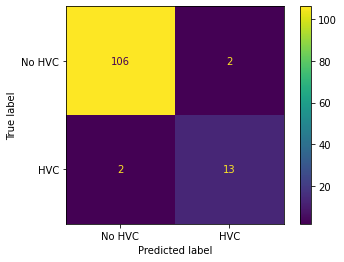

Test accuracy for KNN: 0.92

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.73      0.53      0.62        15

    accuracy                           0.92       123
   macro avg       0.83      0.75      0.78       123
weighted avg       0.91      0.92      0.91       123



<Figure size 720x720 with 0 Axes>

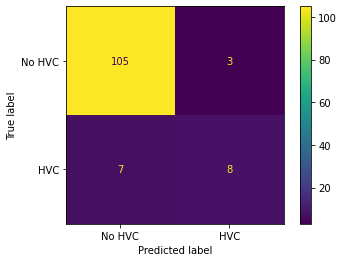

Test accuracy for Decision Tree: 0.93

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.69      0.73      0.71        15

    accuracy                           0.93       123
   macro avg       0.83      0.84      0.83       123
weighted avg       0.93      0.93      0.93       123



<Figure size 720x720 with 0 Axes>

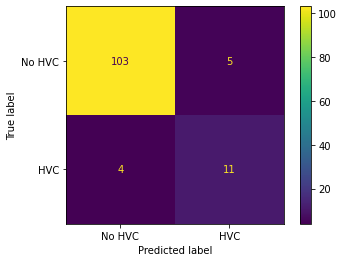

Test accuracy for Random Forest: 0.97

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.87      0.87      0.87        15

    accuracy                           0.97       123
   macro avg       0.92      0.92      0.92       123
weighted avg       0.97      0.97      0.97       123



<Figure size 720x720 with 0 Axes>

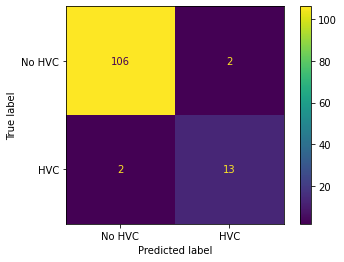

Test accuracy for AdaBoost: 0.98

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.88      0.93      0.90        15

    accuracy                           0.98       123
   macro avg       0.93      0.96      0.94       123
weighted avg       0.98      0.98      0.98       123



<Figure size 720x720 with 0 Axes>

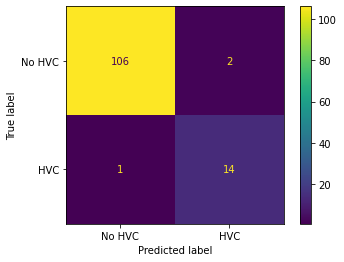

In [30]:
for clf, name in zip(classifiers, names):
    plt.figure(figsize=(10,10))
    plot_confusion_matrix(clf, X_test, y_test, display_labels=categories)
    print('Test accuracy for {}:'.format(name), round(accuracy_score(y_test, clf.predict(X_test)), 2))
    print("")
    print(classification_report(y_test, clf.predict(X_test)))
    plt.show()